In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("Hotel Reservations.csv")

In [29]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [31]:
df = df.drop(["Booking_ID"], axis=1)

In [32]:
df.columns, len(df.columns)

(Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
        'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
        'arrival_date', 'market_segment_type', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
       dtype='object'),
 18)

In [33]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [34]:
num_cols = df.select_dtypes(["int", "float"]).columns
num_cols

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [36]:
len(num_cols) + len(cat_cols)

18

In [44]:
for i in num_cols:
    print(df[i].value_counts())

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64
lead_time
0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: count, Length: 352, dtype: int64
arrival_year
2018    29761
2017     6514
Name: count, dtype: int64
arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    

In [45]:
for i in cat_cols:
    print(df[i].value_counts())

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


> booking without any adults

In [62]:
df.no_of_children[df.no_of_adults == 0].value_counts()

no_of_children
2    133
3      5
1      1
Name: count, dtype: int64

In [67]:
df.booking_status[df.no_of_adults == 0].value_counts()

booking_status
Not_Canceled    95
Canceled        44
Name: count, dtype: int64

In [103]:
df.market_segment_type[df.no_of_adults == 0].value_counts()

market_segment_type
Online           134
Complementary      4
Offline            1
Name: count, dtype: int64

> number of days 0 instances

In [85]:
df.no_of_weekend_nights[df.no_of_week_nights == 0].value_counts()

no_of_weekend_nights
1    1522
2     787
0      78
Name: count, dtype: int64

In [86]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].booking_status.value_counts()

booking_status
Not_Canceled    76
Canceled         2
Name: count, dtype: int64

In [89]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].avg_price_per_room.sum()

0.0

In [96]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].type_of_meal_plan.value_counts()

type_of_meal_plan
Meal Plan 1     57
Not Selected    16
Meal Plan 2      5
Name: count, dtype: int64

In [101]:
df[(df.no_of_week_nights == 0) & (df.no_of_weekend_nights == 0)].market_segment_type.value_counts()

market_segment_type
Online           65
Complementary    13
Name: count, dtype: int64

> previous cancellations

In [111]:
df.booking_status[df.no_of_previous_cancellations != 0].value_counts()

booking_status
Not_Canceled    322
Canceled         16
Name: count, dtype: int64

## EDA

<Axes: xlabel='arrival_month'>

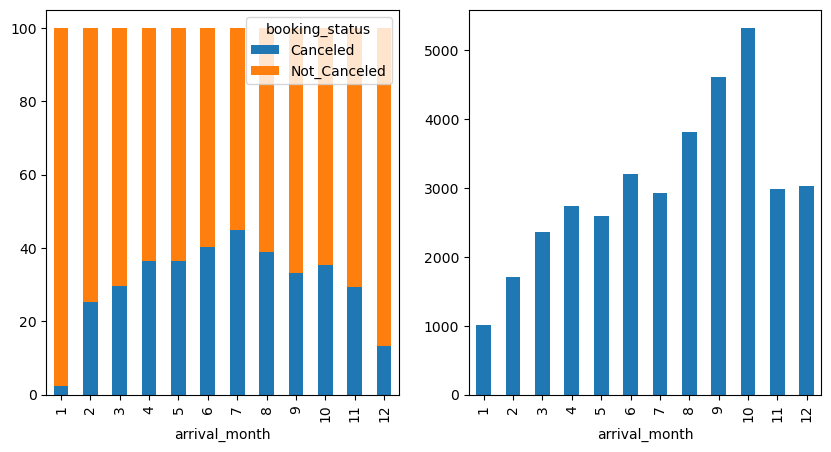

In [132]:
temp = pd.crosstab(df.arrival_month, df.booking_status)
perc = temp.div(temp.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
perc.plot(kind="bar", stacked=True, ax=ax1)
df.arrival_month.value_counts().sort_index().plot(kind="bar", ax=ax2)